In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns


# load data

In [2]:
events = pd.read_csv('data/events.csv')

In [3]:
events

,user,domain,timestamp
0,user_4125925,domain_60,2025-02-01 03:00:05
1,user_989055,domain_126,2025-02-01 03:00:05
2,user_2930721,domain_347,2025-02-01 03:00:06
3,user_3410810,domain_126,2025-02-01 03:00:06
4,user_35865,domain_273,2025-02-01 03:00:06
...,...,...,...
61165615,user_2091178,domain_87,2025-04-10 02:59:36
61165616,user_3877996,domain_396,2025-04-10 02:59:37
61165617,user_4015403,domain_253,2025-04-10 02:59:37
61165618,user_854078,domain_24,2025-04-10 02:59:37


In [ ]:
clicks = pd.read_csv('data/clicks.csv')
offers = pd.read_csv('data/offers.csv')

In [5]:
clicks

,user,click_date,iteration_id
0,user_3095384,2025-04-05 01:24:15,31316880338596639887912
1,user_593821,2025-03-01 00:49:56,311480385764248888096412
2,user_593821,2025-03-01 00:49:56,311480385764248888096412
3,user_2953092,2025-03-18 10:17:50,314205792823160316343812
4,user_2953092,2025-03-18 10:08:11,314205792823360848029812
...,...,...,...
267885,user_3606523,2025-02-07 16:55:52,31329488795838751934012
267886,user_1219395,2025-03-13 05:20:58,313394970150209129041612
267887,user_2628803,2025-02-01 22:57:59,312271352684317693089512
267888,user_4128052,2025-02-01 07:15:17,311257582053109157219012


In [6]:
offers

,user,timestamp,iteration_id
0,user_3095384,2025-04-09 13:39:40,31316880338535030642712
1,user_3095384,2025-04-06 03:00:47,31316880338587849002912
2,user_3095384,2025-04-05 03:24:42,313168803385256331459912
3,user_3095384,2025-04-03 23:03:52,31316880338596639887912
4,user_593821,2025-03-19 22:13:28,311480385764211373627012
...,...,...,...
6430674,user_3058081,2025-02-01 00:04:52,3120615234407582783912
6430675,user_3565347,2025-02-01 00:04:02,31334663776489669204112
6430676,user_2953801,2025-02-01 00:04:02,311903803430292679688312
6430677,user_2780609,2025-02-01 00:01:12,313203691546281489017012


# EDA

In [8]:
offers['timestamp'] = pd.to_datetime(offers['timestamp'])

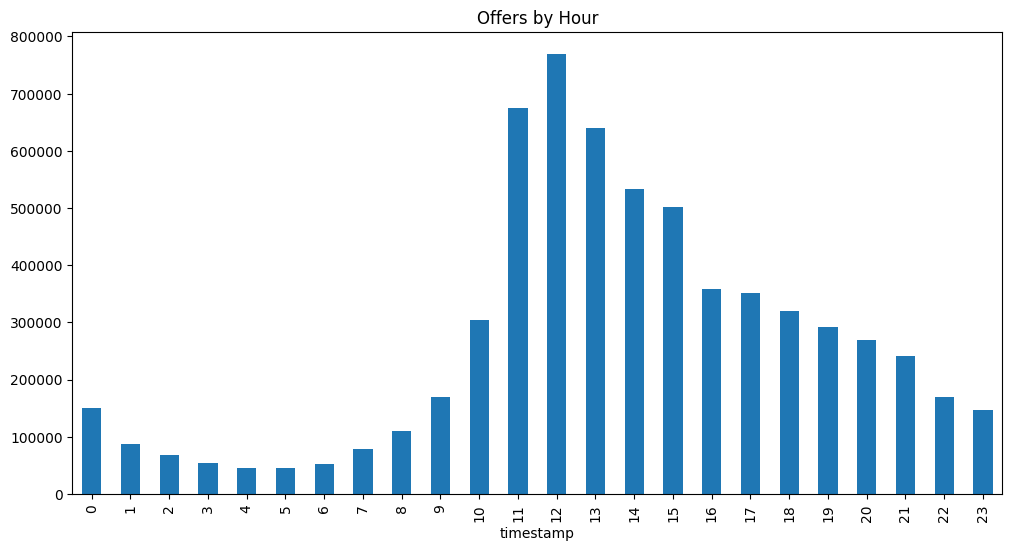

In [9]:
plt.figure(figsize=(12, 6))
offers['timestamp'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('Offers by Hour')
plt.show()

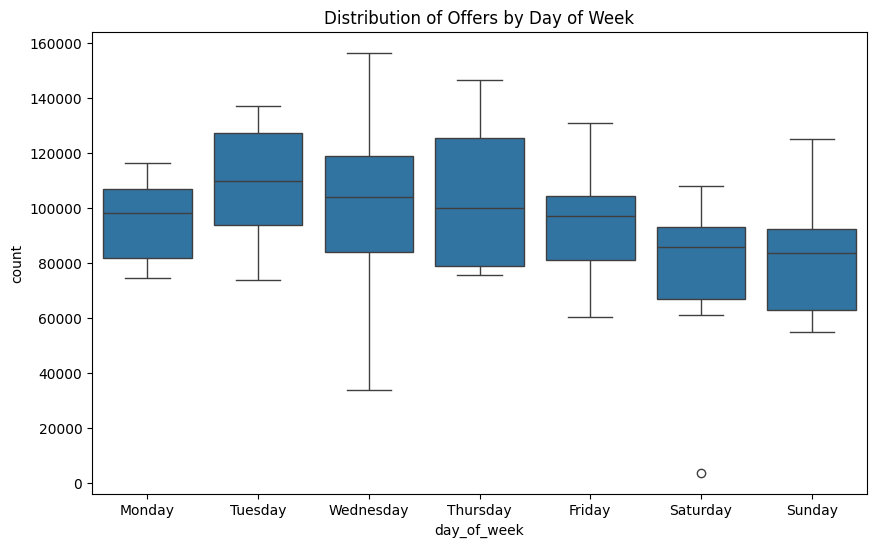

In [10]:
offers['date'] = pd.to_datetime(offers['timestamp']).dt.date

daily_offers = offers.groupby('date').size().reset_index(name='count')
daily_offers['day_of_week'] = pd.to_datetime(daily_offers['date']).dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='count', data=daily_offers, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Distribution of Offers by Day of Week')
plt.show()

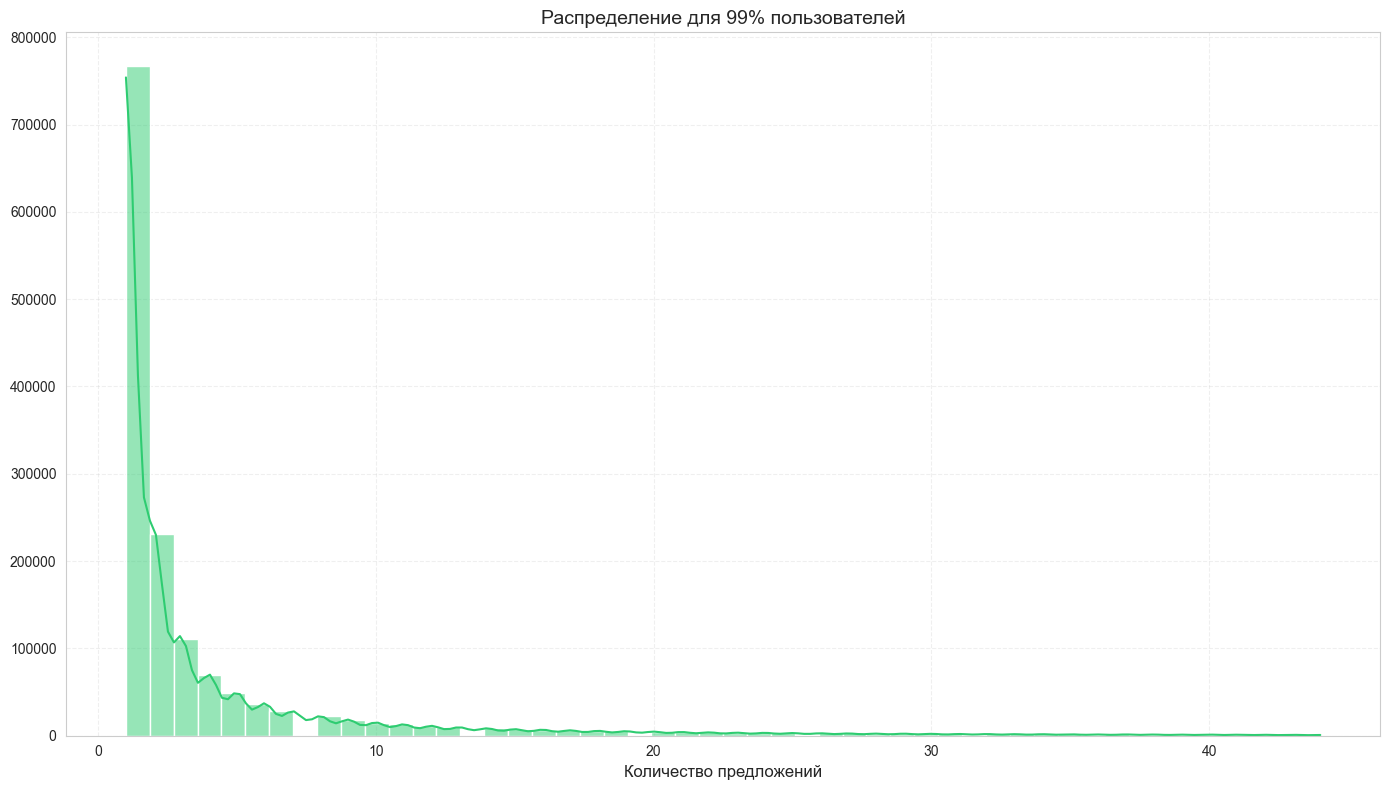

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Подсчет предложений на пользователя
user_offers = offers['user'].value_counts()

plt.figure(figsize=(14, 8))

# Zoom in на 99% пользователей
sns.histplot(user_offers[user_offers <= np.percentile(user_offers, 99)], 
             bins=50, kde=True, color='#2ecc71')
plt.title('Распределение для 99% пользователей', fontsize=14)
plt.xlabel('Количество предложений', fontsize=12)
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

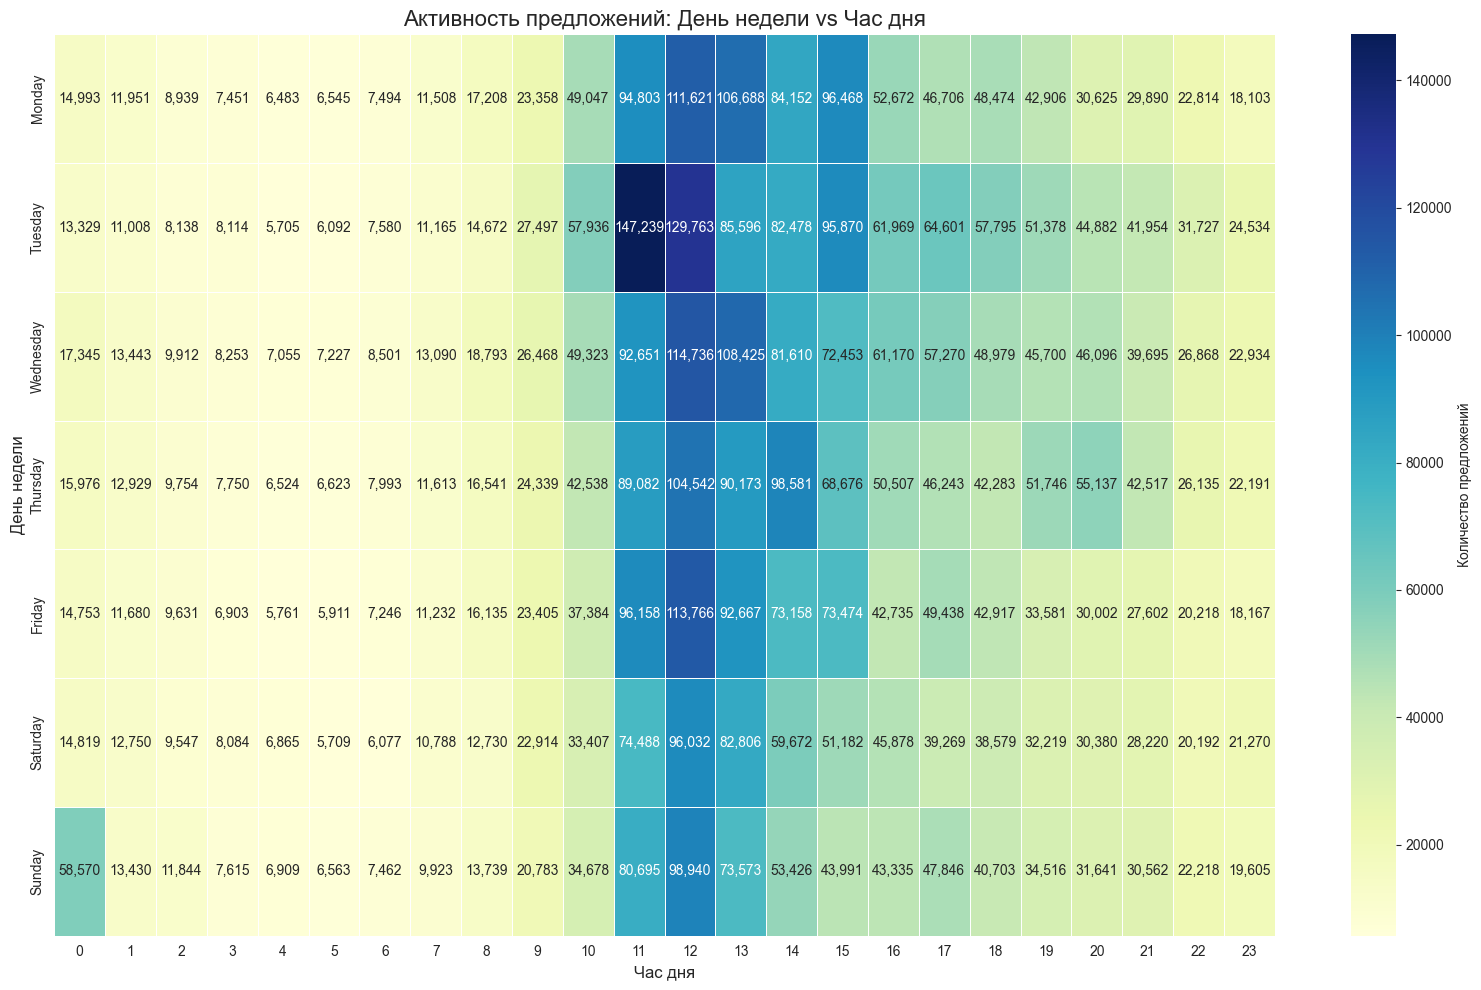

In [38]:
# Подготовка данных
offers['hour'] = pd.to_datetime(offers['timestamp']).dt.hour
offers['weekday'] = pd.to_datetime(offers['timestamp']).dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Создаем сводную таблицу
heatmap_data = offers.groupby(['weekday', 'hour']).size().unstack().reindex(weekday_order)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu', 
    annot=True, 
    fmt=',.0f',
    linewidths=.5,
    cbar_kws={'label': 'Количество предложений'}
)

plt.title('Активность предложений: День недели vs Час дня', fontsize=16)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('День недели', fontsize=12)
plt.tight_layout()
plt.show()

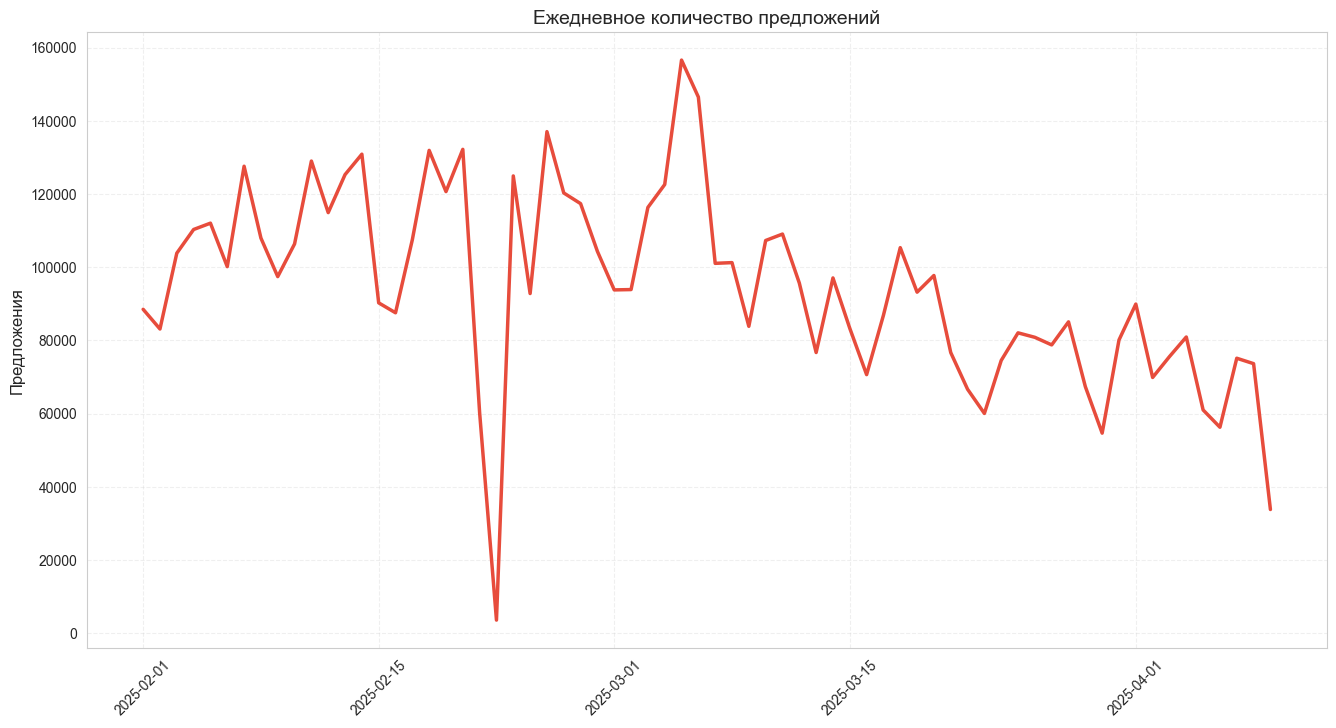

In [41]:
# Подготовка данных
offers['date'] = pd.to_datetime(offers['timestamp']).dt.date
daily_data = offers.groupby('date').agg(
    offers_count=('iteration_id', 'count'),
    users_count=('user', 'nunique')
).reset_index()

plt.figure(figsize=(16, 8))

# График количества предложений
plt.plot(daily_data['date'], daily_data['offers_count'], 
         color='#e74c3c', linewidth=2.5)
plt.title('Ежедневное количество предложений', fontsize=14)
plt.ylabel('Предложения', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

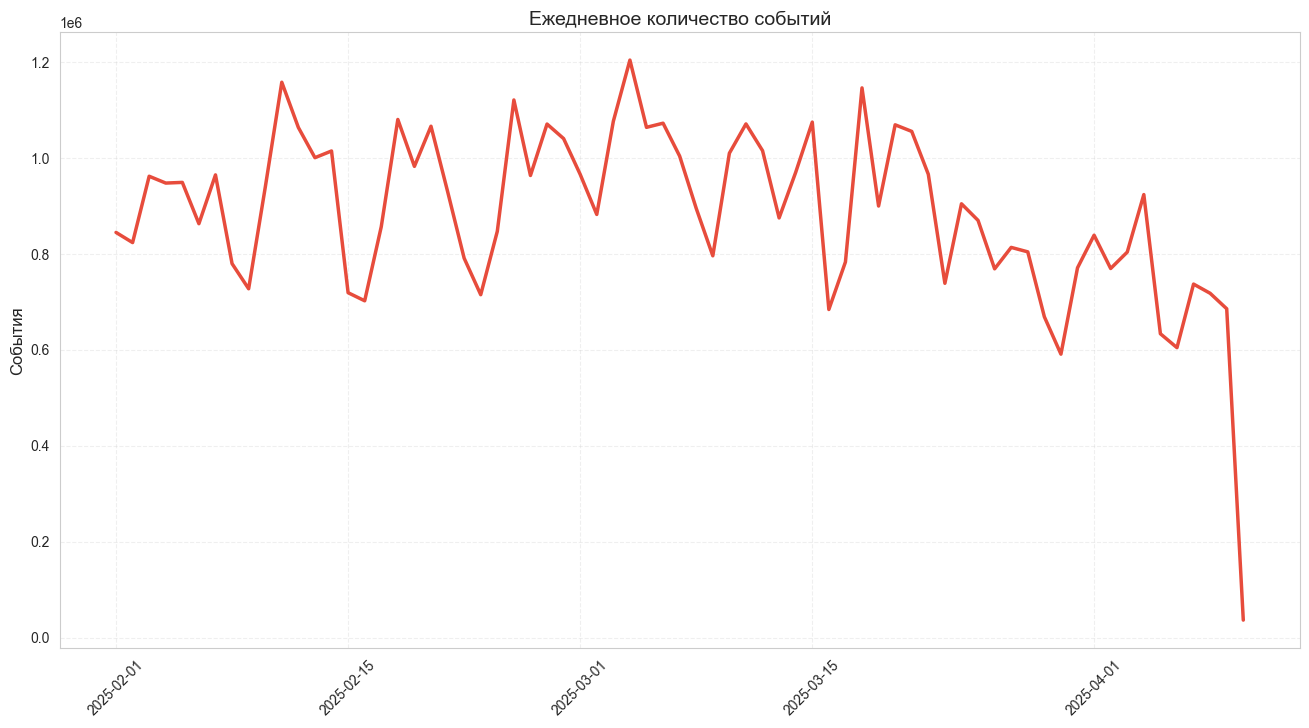

In [44]:
# Подготовка данных
events['date'] = pd.to_datetime(events['timestamp']).dt.date
daily_data = events.groupby('date').agg(
    events_count=('domain', 'count'),
    users_count=('user', 'nunique')
).reset_index()

plt.figure(figsize=(16, 8))

# График количества предложений
plt.plot(daily_data['date'], daily_data['events_count'], 
         color='#e74c3c', linewidth=2.5)
plt.title('Ежедневное количество событий', fontsize=14)
plt.ylabel('События', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [11]:
# Объединяем offers и clicks по iteration_id и user
merged_df = pd.merge(
    offers, 
    clicks, 
    on=['iteration_id', 'user'],
    how='left',
    suffixes=('_offer', '_click')
)

# Добавляем флаг клика
merged_df['clicked'] = ~merged_df['click_date'].isna()

# Рассчитываем время до клика
merged_df['time_to_click'] = (
    pd.to_datetime(merged_df['click_date']) - 
    pd.to_datetime(merged_df['timestamp'])
).dt.total_seconds() / 60  # в минутах

C:\Users\ivanc\AppData\Local\Temp\ipykernel_16284\2589103709.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


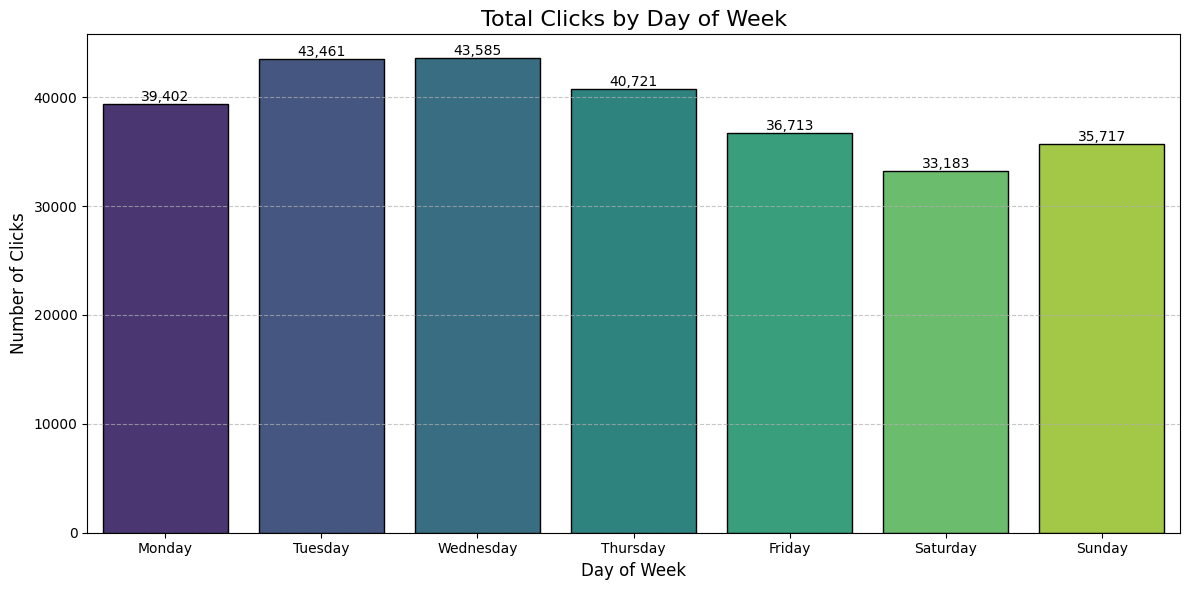

In [12]:
# Подготовка данных
merged_df['click_weekday'] = pd.to_datetime(merged_df['click_date']).dt.day_name()
daily_clicks = merged_df.groupby('click_weekday', as_index=False).size()

# Упорядочиваем дни
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_clicks['click_weekday'] = pd.Categorical(daily_clicks['click_weekday'], 
                                              categories=weekday_order,
                                              ordered=True)

# Построение графика
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    x='click_weekday', 
    y='size', 
    data=daily_clicks.sort_values('click_weekday'),
    palette='viridis',
    edgecolor='black'
)

plt.title('Total Clicks by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for p in bar.patches:
    bar.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=10, color='black',
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

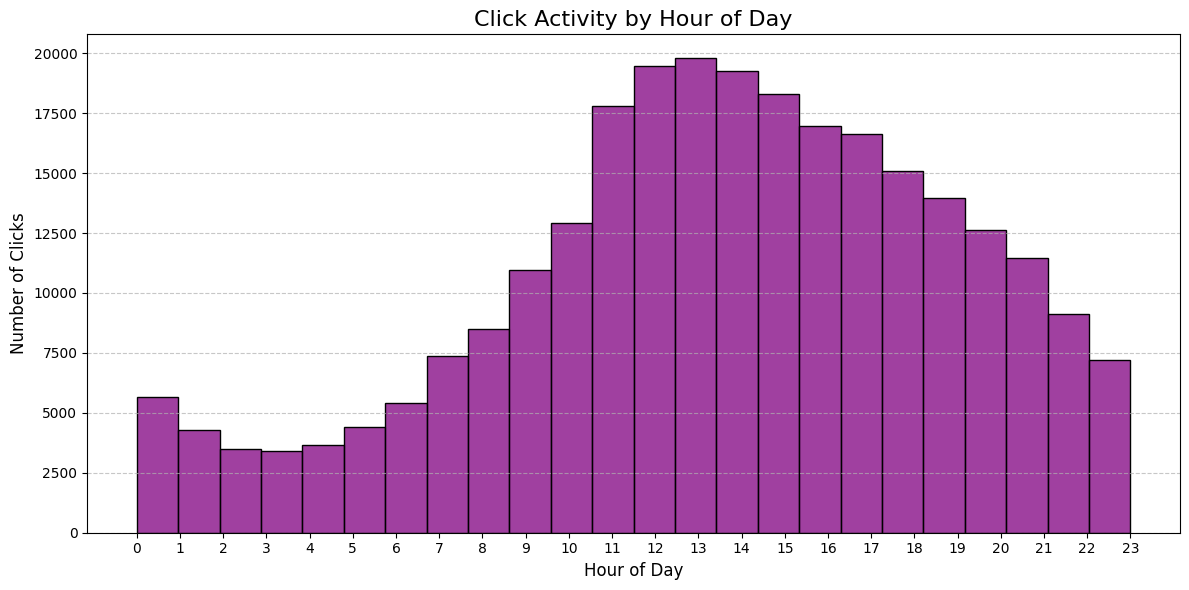

In [13]:
# Извлечение часа из даты клика
clicks['click_hour'] = pd.to_datetime(clicks['click_date']).dt.hour

# Построение графика
plt.figure(figsize=(12, 6))
sns.histplot(
    clicks['click_hour'], 
    bins=24, 
    kde=False,
    color='purple',
    edgecolor='black'
)

plt.title('Click Activity by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

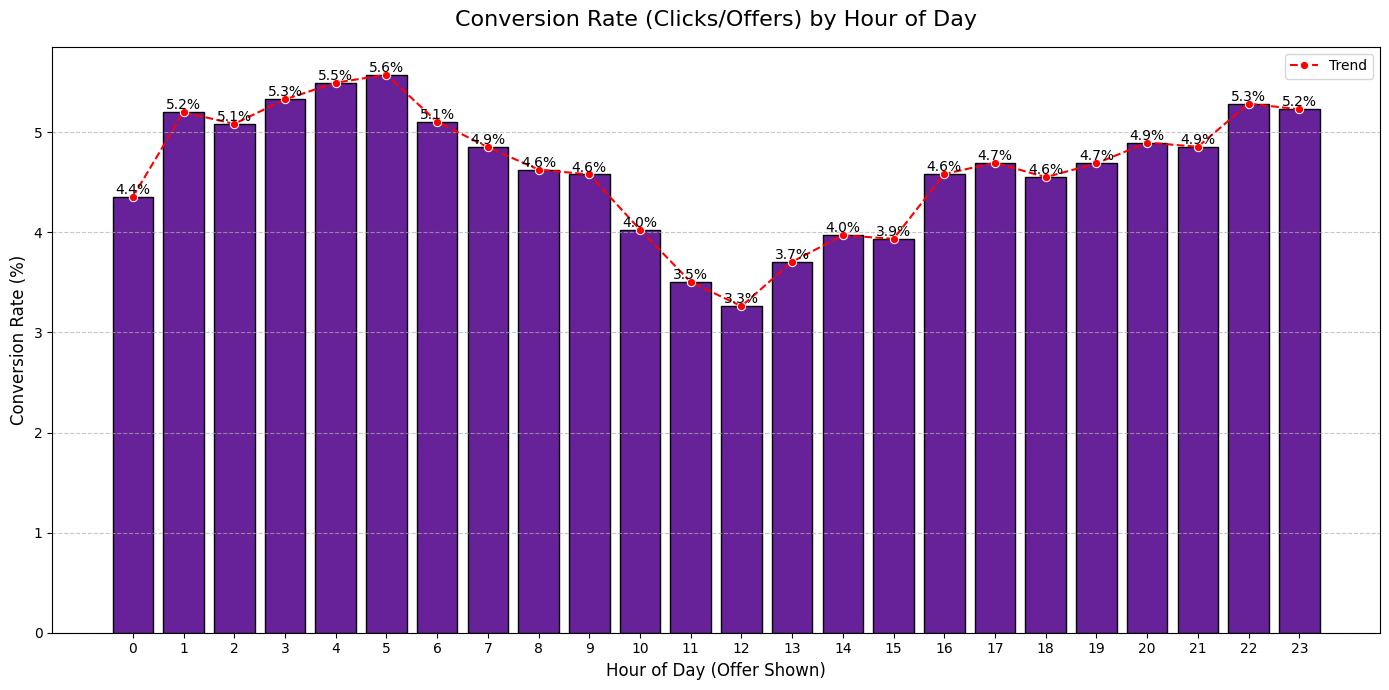

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Подготовка данных
# Извлекаем час из времени показа предложения
merged_df['offer_hour'] = pd.to_datetime(merged_df['timestamp']).dt.hour

# Группируем по часу и считаем метрики
hourly_data = merged_df.groupby('offer_hour').agg(
    offers=('iteration_id', 'count'),
    clicks=('clicked', 'sum')
).reset_index()

# Рассчитываем конверсию
hourly_data['conversion_rate'] = (hourly_data['clicks'] / hourly_data['offers']) * 100  # в процентах

# 2. Построение графика
plt.figure(figsize=(14, 7))
bar = sns.barplot(
    x='offer_hour', 
    y='conversion_rate', 
    data=hourly_data,
    color='#6a0dad',
    edgecolor='black'
)

# Настройка оформления
plt.title('Conversion Rate (Clicks/Offers) by Hour of Day', fontsize=16, pad=15)
plt.xlabel('Hour of Day (Offer Shown)', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for p in bar.patches:
    bar.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Добавление линии тренда
sns.lineplot(
    x='offer_hour',
    y='conversion_rate',
    data=hourly_data,
    color='red',
    linestyle='--',
    marker='o',
    label='Trend',
    ax=plt.gca()
)

plt.legend()
plt.tight_layout()
plt.show()

In [15]:
print(f"Total events: {len(events):,}")
print(f"Unique users: {events['user'].nunique():,}")
print(f"Unique domains: {events['domain'].nunique():,}")
print(f"Time range: {events['timestamp'].min()} to {events['timestamp'].max()}")

Total events: 61,165,620
Unique users: 4,285,550
Unique domains: 522
Time range: 2025-02-01 03:00:05 to 2025-04-10 02:59:37


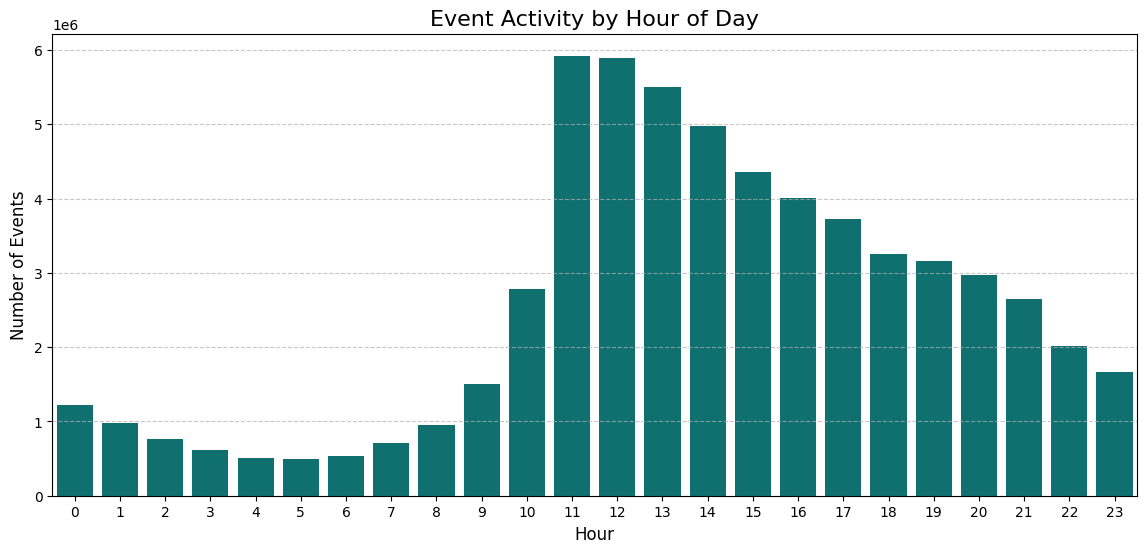

In [16]:
events['hour'] = pd.to_datetime(events['timestamp']).dt.hour
hourly_events = events['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_events.index, y=hourly_events.values, color='teal')
plt.title('Event Activity by Hour of Day', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ivanc\AppData\Local\Temp\ipykernel_16284\1319690566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_events.index, y=weekday_events.values, palette='viridis')


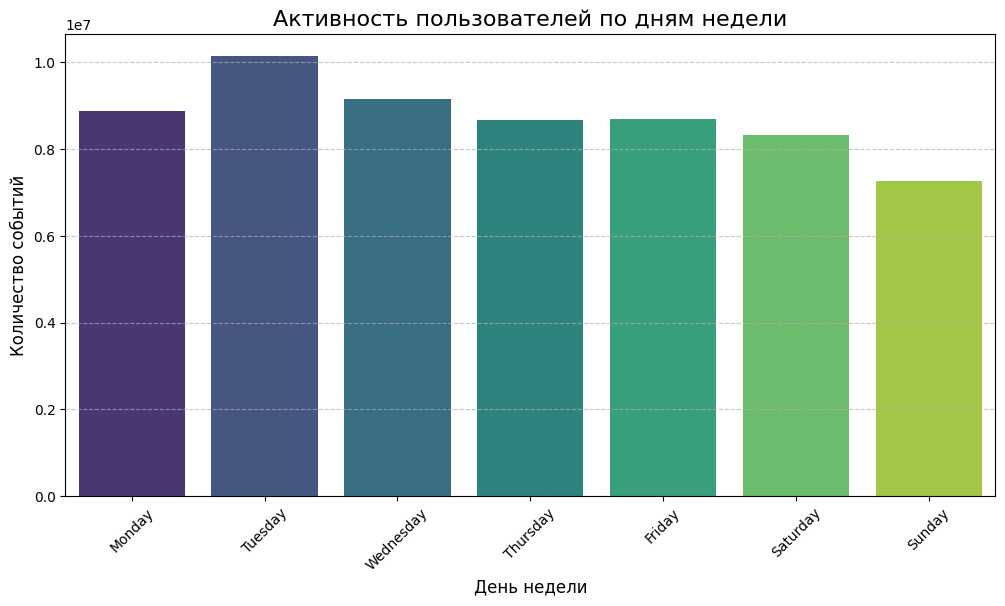

In [21]:
events['weekday'] = pd.to_datetime(events['timestamp']).dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_events = events['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_events.index, y=weekday_events.values, palette='viridis')
plt.title('Активность пользователей по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество событий', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ivanc\AppData\Local\Temp\ipykernel_16284\3710223045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_domains.index, x=top_domains.values, palette='rocket')


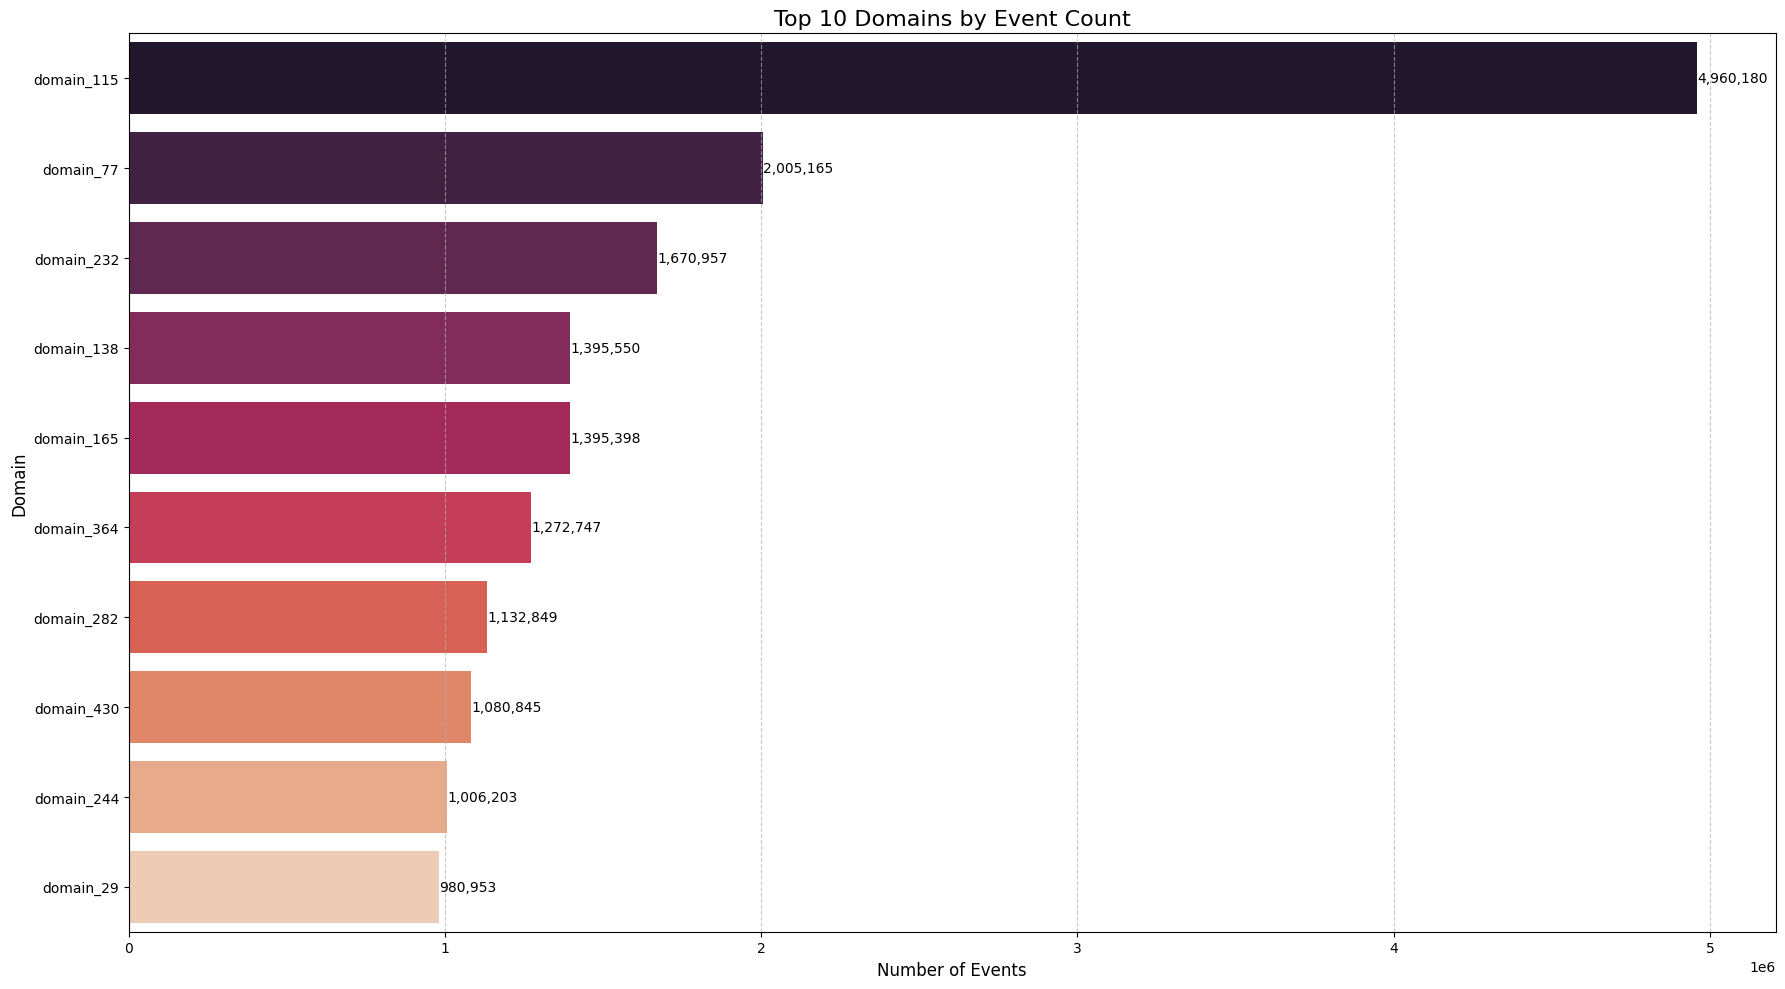

In [25]:
top_domains = events['domain'].value_counts().head(10)

plt.figure(figsize=(18, 10))
sns.barplot(y=top_domains.index, x=top_domains.values, palette='rocket')
plt.title('Top 10 Domains by Event Count', fontsize=16)
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Domain', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавление значений
for i, v in enumerate(top_domains.values):
    plt.text(v + 1000, i, f"{v:,}", color='black', va='center', fontsize=10)
    
plt.tight_layout()
plt.show()

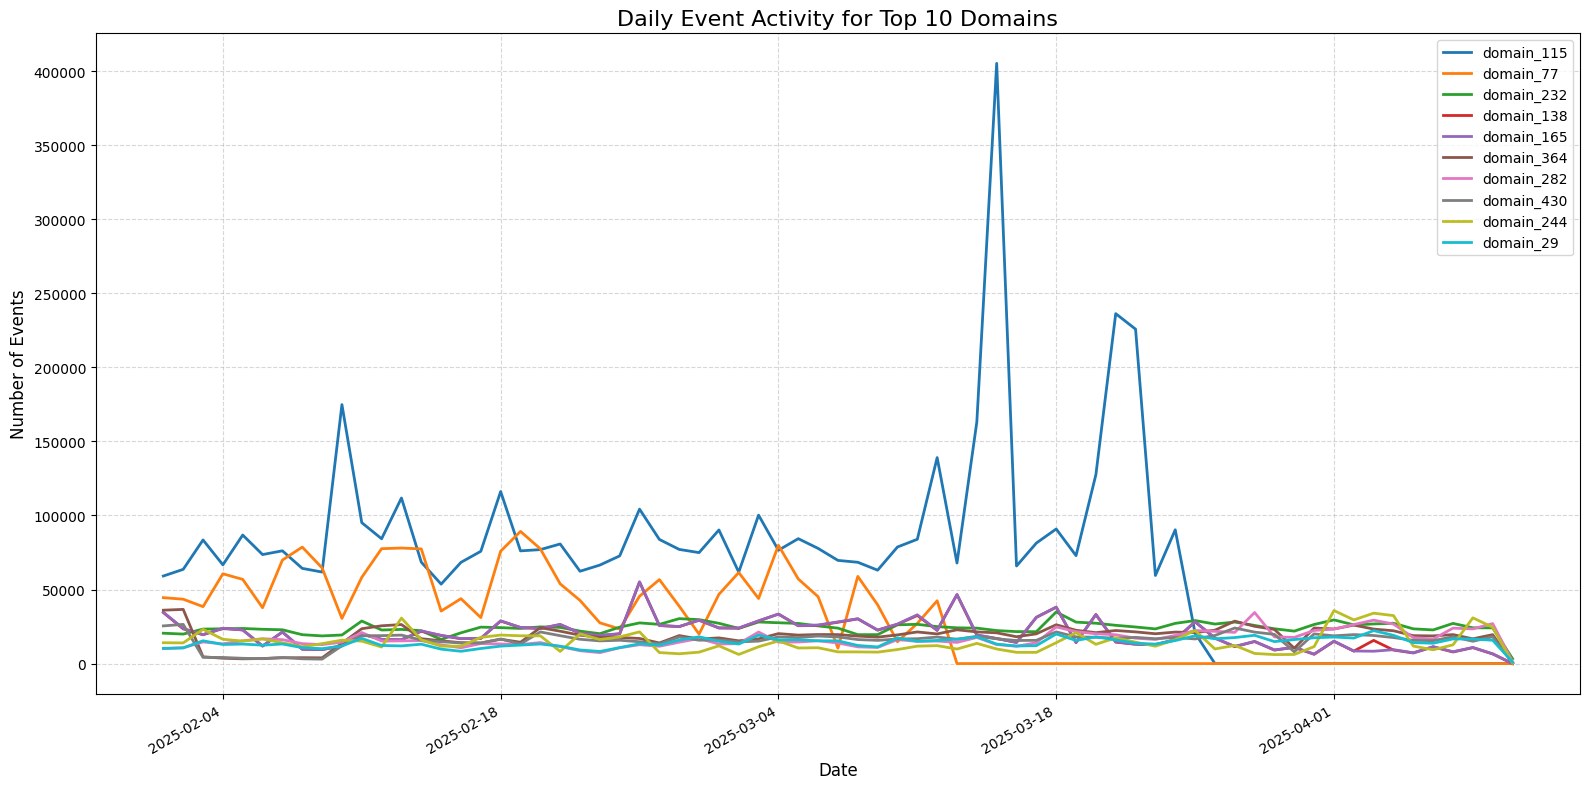

In [26]:
# Выбор топ-5 доменов
top5_domains = events['domain'].value_counts().head(10).index.tolist()

# Подготовка данных
events['date'] = pd.to_datetime(events['timestamp']).dt.date
domain_daily = events[events['domain'].isin(top5_domains)].groupby(
    ['date', 'domain']).size().unstack().fillna(0)

# Построение графика
plt.figure(figsize=(16, 8))
for domain in top5_domains:
    plt.plot(domain_daily.index, domain_daily[domain], label=domain, linewidth=2)

plt.title('Daily Event Activity for Top 10 Domains', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

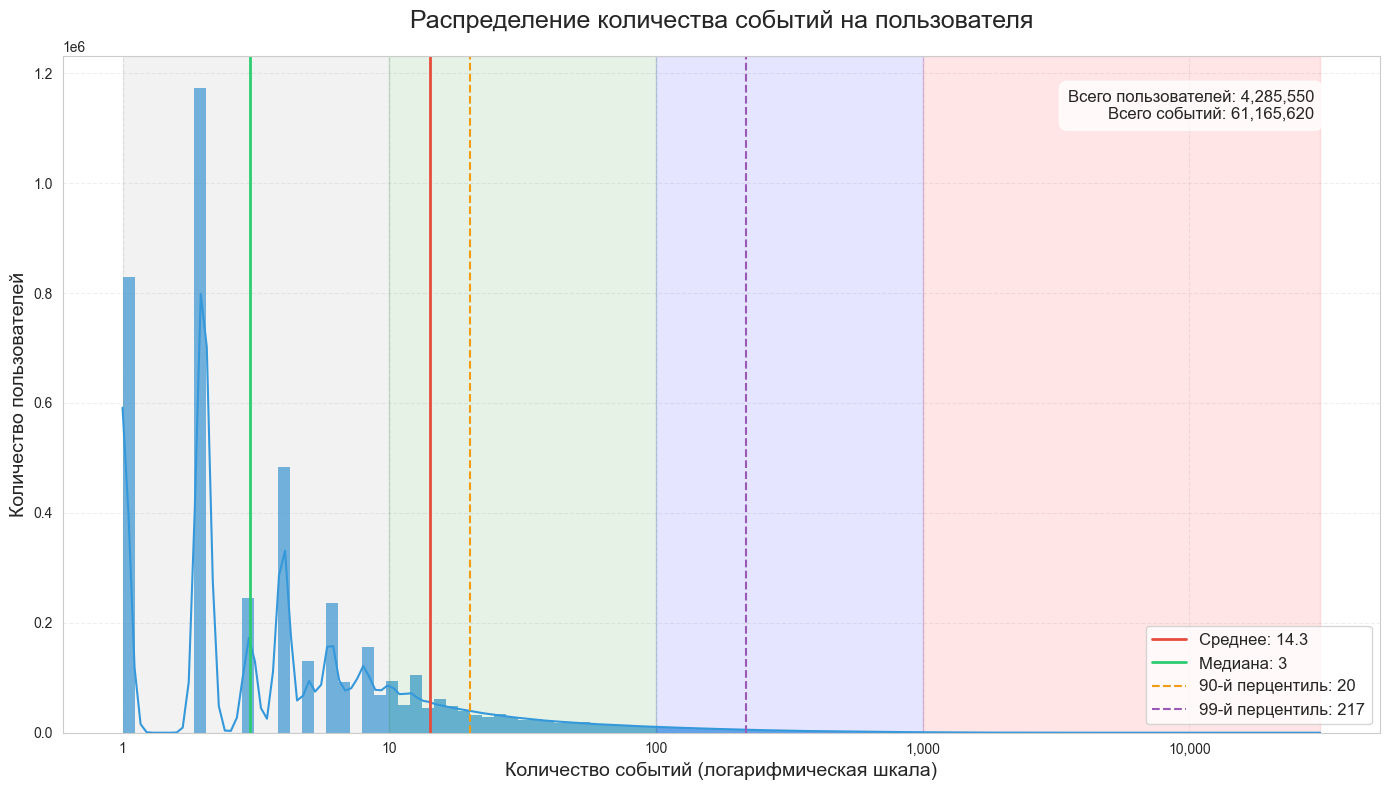

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Рассчитываем количество событий на пользователя
user_events = events.groupby('user').size().reset_index(name='event_count')
data = user_events['event_count']

# Рассчитываем статистики
mean_events = data.mean()
median_events = data.median()
percentile_90 = np.percentile(data, 90)
percentile_99 = np.percentile(data, 99)

# Настройка стиля
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Гистограмма с KDE
ax = sns.histplot(
    data, 
    bins=100, 
    kde=True,
    log_scale=True,
    color='#3498db',
    edgecolor='none',
    alpha=0.7
)

# Вертикальные линии для статистик
plt.axvline(mean_events, color='#e74c3c', linestyle='-', linewidth=2, label=f'Среднее: {mean_events:,.1f}')
plt.axvline(median_events, color='#2ecc71', linestyle='-', linewidth=2, label=f'Медиана: {median_events:,.0f}')
plt.axvline(percentile_90, color='#f39c12', linestyle='--', linewidth=1.5, label=f'90-й перцентиль: {percentile_90:,.0f}')
plt.axvline(percentile_99, color='#9b59b6', linestyle='--', linewidth=1.5, label=f'99-й перцентиль: {percentile_99:,.0f}')

# Настройка оформления
plt.title('Распределение количества событий на пользователя', fontsize=18, pad=20)
plt.xlabel('Количество событий (логарифмическая шкала)', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.legend(fontsize=12)

# Форматирование осей
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.3)

# Аннотации
plt.annotate(
    f'Всего пользователей: {len(user_events):,}\nВсего событий: {data.sum():,}', 
    xy=(0.95, 0.95),
    xycoords='axes fraction',
    ha='right',
    va='top',
    fontsize=12,
    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8)
)

# Зоны активности
plt.axvspan(1, 10, alpha=0.1, color='gray', label='Низкая активность')
plt.axvspan(10, 100, alpha=0.1, color='green', label='Средняя активность')
plt.axvspan(100, 1000, alpha=0.1, color='blue', label='Высокая активность')
plt.axvspan(1000, data.max(), alpha=0.1, color='red', label='Экстремальная активность')

plt.tight_layout()
plt.show()

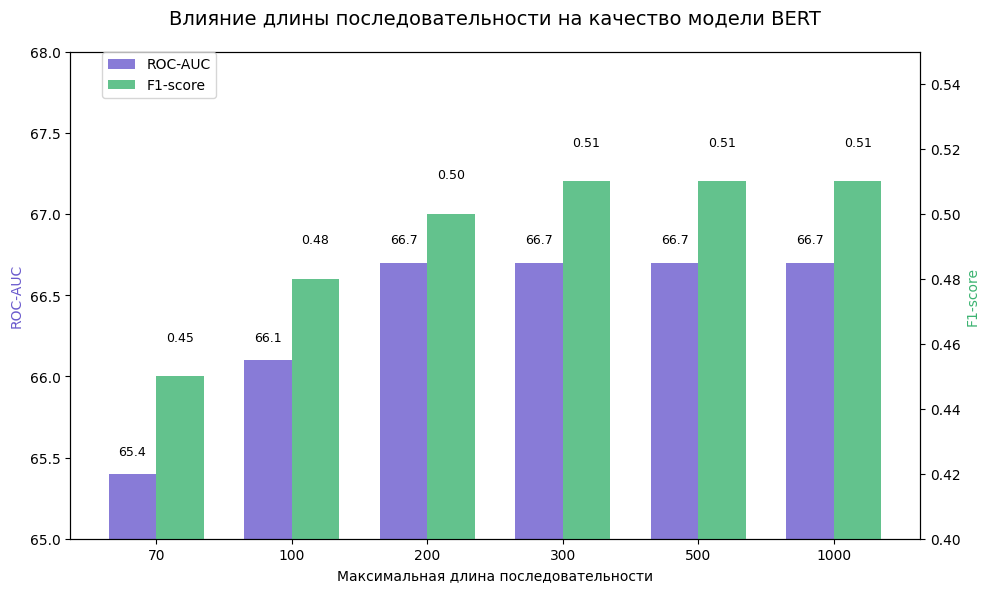

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
lengths = [70, 100, 200, 300, 500, 1000]
roc_auc = [65.4, 66.1, 66.7, 66.7, 66.7, 66.7]
f1_score = [0.45, 0.48, 0.50, 0.51, 0.51, 0.51]

# Настройки графика
x = np.arange(len(lengths))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Гистограммы
bars1 = ax1.bar(x - width/2, roc_auc, width, label='ROC-AUC', color='slateblue', alpha=0.8)
bars2 = ax2.bar(x + width/2, f1_score, width, label='F1-score', color='mediumseagreen', alpha=0.8)

# Подписи значений
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Настройка осей и подписей
ax1.set_xlabel('Максимальная длина последовательности')
ax1.set_ylabel('ROC-AUC', color='slateblue')
ax2.set_ylabel('F1-score', color='mediumseagreen')
ax1.set_xticks(x)
ax1.set_xticklabels(lengths)
ax1.set_ylim(65, 68)
ax2.set_ylim(0.4, 0.55)

# Заголовок и легенда
fig.suptitle('Влияние длины последовательности на качество модели BERT', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.92))

plt.tight_layout()
plt.show()


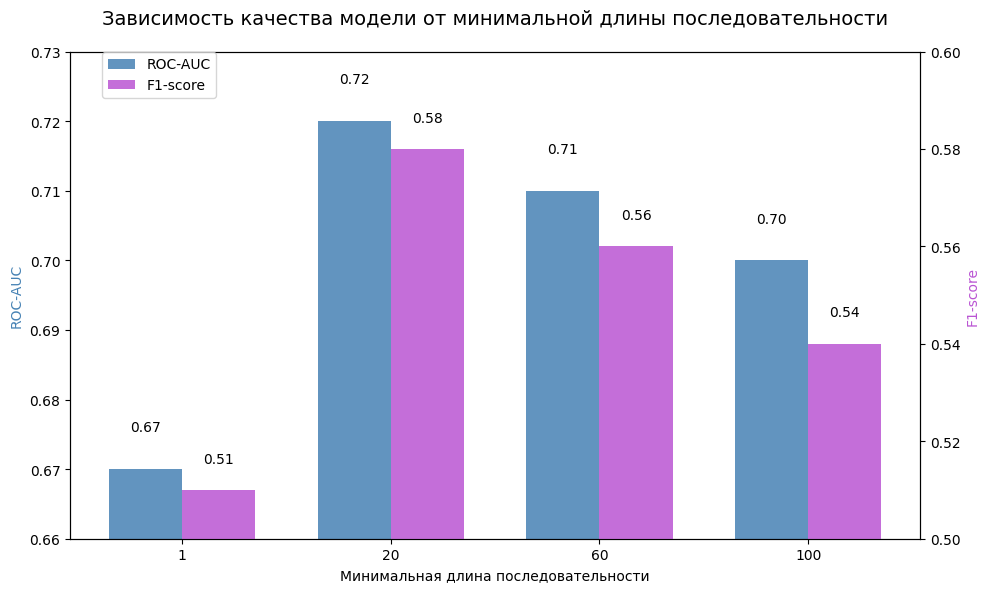

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
min_lengths = [1, 20, 60, 100]
roc_auc = [0.67, 0.72, 0.71, 0.70]
f1_score = [0.51, 0.58, 0.56, 0.54]

# Подготовка графика
x = np.arange(len(min_lengths))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, roc_auc, width, label='ROC-AUC', color='steelblue', alpha=0.85)
bars2 = ax2.bar(x + width/2, f1_score, width, label='F1-score', color='mediumorchid', alpha=0.85)

# Подписи на столбцах
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005, f'{height:.2f}', ha='center', va='bottom')

# Подписи и оформление
ax1.set_xlabel('Минимальная длина последовательности')
ax1.set_ylabel('ROC-AUC', color='steelblue')
ax2.set_ylabel('F1-score', color='mediumorchid')
ax1.set_xticks(x)
ax1.set_xticklabels(min_lengths)
ax1.set_ylim(0.66, 0.73)
ax2.set_ylim(0.5, 0.6)

fig.suptitle('Зависимость качества модели от минимальной длины последовательности', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.92))

plt.tight_layout()
plt.show()

